Names:
Julian Avila - 20212107030
Juan Acuña - 20212107034

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [100]:
iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [101]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
dtype: object

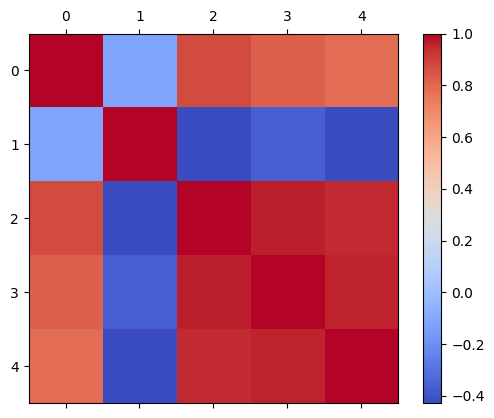

In [102]:
corr_var = df.corr()

fig, ax = plt.subplots()
cax = ax.matshow(corr_var, cmap="coolwarm")
fig.colorbar(cax)

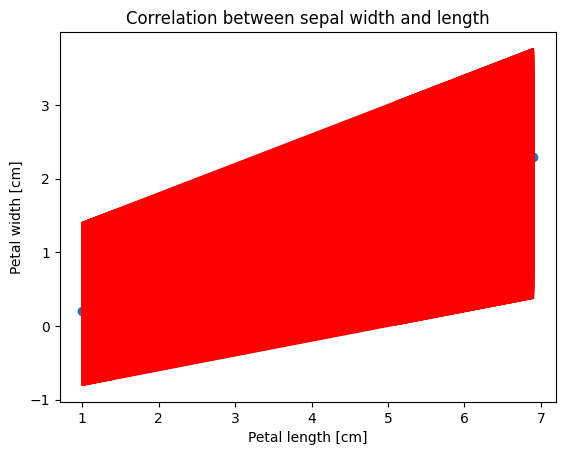

In [103]:
plt.scatter(df["petal length (cm)"], df["petal width (cm)"])

m = np.linspace(0.2, 0.4, 100)
b = np.linspace(-1.0, 1.0, 100)

for i in m:
    for j in b:
        plt.plot(df["petal length (cm)"], i*df["petal length (cm)"]+j, color='r')

plt.title("Correlation between sepal width and length")
plt.xlabel("Petal length [cm]")
plt.ylabel("Petal width [cm]")
plt.show()

In [104]:

def RMSE(x, y, m, b):
    rmse = []
    n = len(x)
    for i in range(len(m)):
        for k in range(len(b)):
            err = 0.0
            for j in range(len(x)):
                y_pre = m[i] * x[j] + b[k]
                err += (y[j] - y_pre) * (y[j] - y_pre)
            rmse.append([np.sqrt(err / n), m[i], i, b[k], k])
    return rmse

rmse = RMSE(df["petal length (cm)"], df["petal width (cm)"], m, b)
print(min(rmse))

[np.float64(0.20717516557172203), np.float64(0.4), 99, np.float64(-0.31313131313131304), 34]


The algorithm used gives:
- m = 0.4
- b = -0.3131..

m is the biggest possible value, so the first range for m must be higher.
Then we are going to run the algorithm again but restricting the range for m
and b to
- m in (0.30, 0.50)
- b in (-0.50, -0.20)

In [105]:
m = np.linspace(0.30, 0.50, 100)
b = np.linspace(-0.50, -0.20, 100)

rmse = RMSE(df["petal length (cm)"], df["petal width (cm)"], m, b)
print(min(rmse))

[np.float64(0.20510601676810483), np.float64(0.41515151515151516), 57, np.float64(-0.3606060606060606), 46]


The algorithm used gives:
- m = 0.4151...
- b = -0.360606...

In [106]:
m = np.linspace(0.40, 0.43, 100)
b = np.linspace(-0.40, -0.31, 100)

rmse = RMSE(df["petal length (cm)"], df["petal width (cm)"], m, b)
print(min(rmse))

[np.float64(0.2051034768219908), np.float64(0.41575757575757577), 52, np.float64(-0.36272727272727273), 41]


The new values given are:
- m = 0.415757..
- b = -0.362727...

As the previous value is not that different from the new, we will consider
these as the closest slope and intercept for the linear regression.

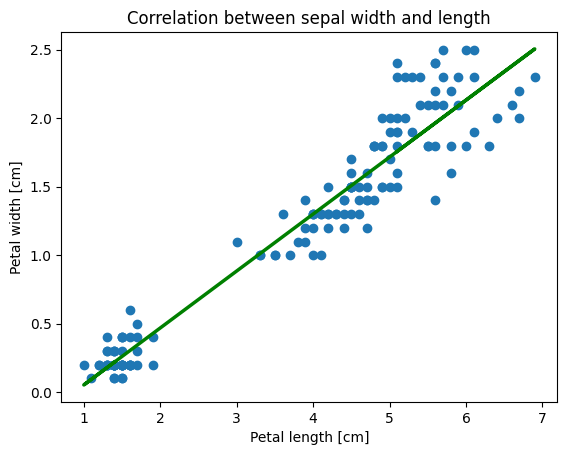

In [107]:
plt.scatter(df["petal length (cm)"], df["petal width (cm)"])

m = min(rmse)[1]
b = min(rmse)[3]

plt.plot(df["petal length (cm)"], m*df["petal length (cm)"] + b, linewidth=2.5,
        color='green')


plt.title("Correlation between sepal width and length")
plt.xlabel("Petal length [cm]")
plt.ylabel("Petal width [cm]")
plt.show()